In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from dataset import get_test_img
import torchvision
import torch
from models import CSPWithEFM


device = "cuda:1"
model = torch.load("fasterRcnn.pth").to(device)

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


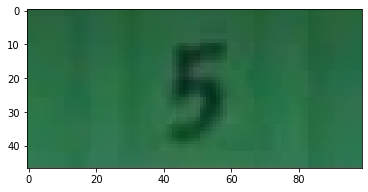

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


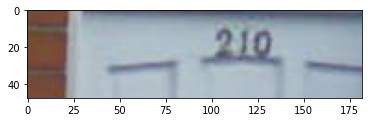

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


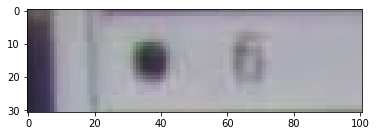

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


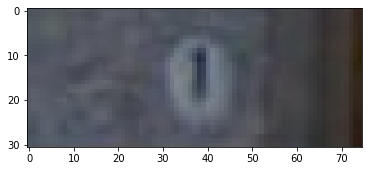

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


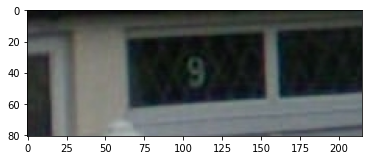

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


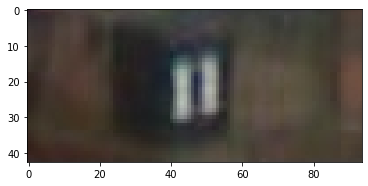

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


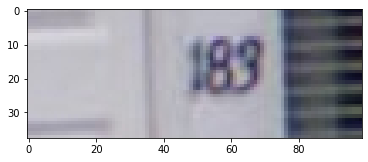

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


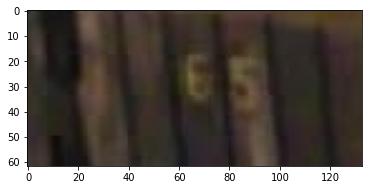

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


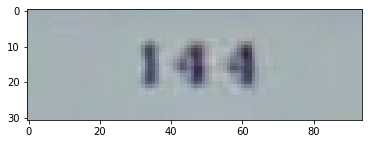

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


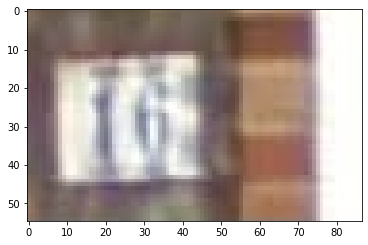

[{'boxes': tensor([], device='cuda:1', size=(0, 4), grad_fn=<StackBackward>), 'labels': tensor([], device='cuda:1', dtype=torch.int64), 'scores': tensor([], device='cuda:1', grad_fn=<IndexBackward>)}]


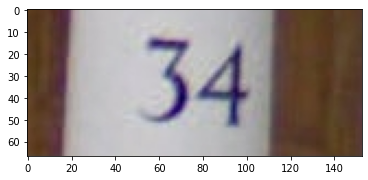

In [3]:
model.eval()
for idx in range(13068):
    dic = {}
    image = get_test_img(idx+1).unsqueeze(0).to(device)
    output = model(image)
    image_permuted = image[0].permute(1,2,0).to("cpu")

    fig,ax = plt.subplots(1)
    ax.imshow(image_permuted)

    boxes = output[0]["boxes"].to('cpu').detach().numpy()
    labels = output[0]["labels"].to('cpu').detach().numpy()
    scores = output[0]["scores"].to('cpu').detach().numpy()

    # ignore the bbox whose score is less than 0.25
    boxes = boxes[scores > 0.25]
    labels = labels[scores > 0.25]
    scores = scores[scores > 0.25]


    for (bbox,label) in zip(boxes,labels):
        left = bbox[0]
        top = bbox[1]
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]

        rect = patches.Rectangle((left,top),width,height,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        plt.text(left, top, str(label.item()), color='r', size='x-large')
    plt.show()
    
    if idx == 10:
        break